<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220409_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀

In [1]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')

In [2]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
fish.shape # (159, 6)
pd.unique(fish['Species']) # array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'], dtype=object)

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

### Species열 : 타깃 데이터(7가지의 생선을 구분 = 다중분류)
### 나머지 5개열 : 입력 데이터

In [6]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']] # 입력 데이터
fish_target = fish['Species']

In [8]:
fish_input[:5] # 데이터프레임 형태로, 열의 이름 까지 같이 딸려옴(→ 데이터만 이용하기 위하여 numpy 배열로 바꿔줘야함)

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [9]:
fish_input = fish_input.to_numpy() # 데이터만 이용하기 위하여 numpy 배열로 변환
fish_target = fish_target.to_numpy()

In [10]:
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

### 훈련/테스트 데이터 분할

In [11]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

### 표준화 전처리
- 길이,무게,너비 값이 스케일이 안맞기 때문에 각 특성별로 중요도를 맞춘다

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() # 표준화모델 생성
ss.fit(train_input) # 표준화 학습(훈련데이터의 표준화 방식으로 테스트데이터 변환해야함)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### K-최근접 이웃 분류기의 확률 예측

In [14]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3) # KNN 모델 생성
kn.fit(train_scaled, train_target) # KNN 모델 학습

print(kn.score(train_scaled, train_target)) # 학습데이터의 정확도 : 0.8907
print(kn.score(test_scaled, test_target)) # 학습데이터의 정확도 : 0.85

0.8907563025210085
0.85


### 7가지의 target 값을 구분하는 문제 → 다중분류
 - 이진분류시 1,0으로 클래스를 지정하여 타깃 데이터를 만듬
 - 다중분류시 1,0으로 클래스를 지정하거나, 문자열 그대로 타깃값을 사용할 수 있음(사이킷런)


In [ ]:
pd.unique(fish['Species']) # ['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']
kn.classes_ # ['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']
# KNN 모델 학습시 target 데이터는 알파벳순서임

In [17]:
kn.predict(test_scaled[:5]) # 학습데이터로 예측한 target값

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [18]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5]) # 학습데이터로 예측한 target값이 나올 확률
np.round(proba, decimals = 4) # 소수넷째 자리까지 표기하는 반올림

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

### 학습데이터로 예측한 각각의 target값이 나올 확률을 데이터프레임으로 시각화

In [19]:
pd.DataFrame(np.round(proba, decimals = 4), columns = kn.classes_)

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0.0,0.0,1.0000,0.0,0.0000,0.0,0.0
1,0.0,0.0,0.0000,0.0,0.0000,1.0,0.0
2,0.0,0.0,0.0000,1.0,0.0000,0.0,0.0
3,0.0,0.0,0.6667,0.0,0.3333,0.0,0.0
4,0.0,0.0,0.6667,0.0,0.3333,0.0,0.0


위의 3번 인덱스의 최근접 이웃들을 직접 확인해보자(Perch=0.667, Roach=0.333)

(가까운 3개의 이웃이 Perch가 두개, Roach가 하나 일듯)


In [21]:
distance, indexes = kn.kneighbors(test_scaled[3:4]) # 생성된 KNN 모델에 kneighbors()함수로 "이웃의 거리"와 "인덱스"를 추출
indexes # 추출한 인덱스는 학습된 타깃 데이터의 인덱스임(최근접 이웃은 학습데이터 이므로)
train_target[indexes]

array([['Roach', 'Perch', 'Perch']], dtype=object)

### 로지스틱 회귀 : 이름은 회귀이지만 "분류 모델"
 - 선형 회귀와 동일하게 선형 방정식을 학습한다
 - z = a X (Weight) + b X (Length) + c X (Diagonal) + d X (Height) + e X (Width) + f
 - z는 어떤값도 가능하지만 확률이 되려면 0 ~ 1 사이 값이 되어야 함
 - z가 아주 큰 음수일 때 0이되고, 아주 큰 양수 일 때 1이 되도록 하는 방법 → 시그모이드 함수


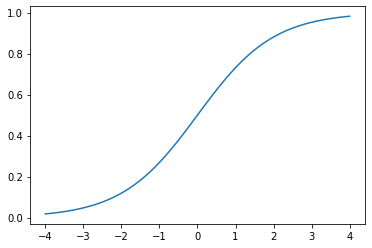

In [32]:
import numpy as np
import matplotlib.pyplot as plt
z = np.linspace(-4, 4, 100)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)

### 로지스틱 회귀로 이진 분류 수행하기

In [34]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
char_arr[[True, False, True, False, False]] # 불리언 인덱싱(넘파이 배열은 True, False를 전달하여 행을 선택할 수 있음)

array(['A', 'C'], dtype='<U1')

훈련세트에서 도미(Bream)와 빙어(Smelt)의 행만 골라내기

In [35]:
# 필터 만들기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # 다중 조건 연산자 사용시 각 조건에 괄호() 유의

# 필터로 훈련세트(훈련데이터, 타깃데이터) 다시 만들기
train_bream_smelt = train_scaled[bream_smelt_indexes] # 훈련타깃이 도미 또는 빙어인 훈련데이터
target_bream_smelt = train_target[bream_smelt_indexes] # 훈련타깃이 도미 또는 빙어인 타깃데이터

### 두가지 생선만 가지고 이진분류

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [37]:
lr.predict(train_bream_smelt[:5]) # 훈련데이터로 예측한 타깃값

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [39]:
lr.predict_proba(train_bream_smelt[:5]) # 훈련데이터로 예측한 타깃값이 나올 확률

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

### 훈련데이터로 예측한 각각의 target값이 나올 확률을 데이터프레임으로 시각화

In [40]:
pd.DataFrame(lr.predict_proba(train_bream_smelt[:5]), columns = lr.classes_)

,Bream,Smelt
0,0.997599,0.002401
1,0.027352,0.972648
2,0.994861,0.005139
3,0.985842,0.014158
4,0.997673,0.002327


문자열을 0, 1 클래스로 별도 설정하지 않으면 사이킷런은 알파벳 순으로 0, 1 클래스 부여함

첫번째 열 : 음성 클래스(0)

두번째 열 : 양성 클래스(1)

### 로지스틱 회귀가 학습한 계수(가중치, 절편)

In [41]:
lr.coef_, lr.intercept_

(array([[-0.4037798 , -0.57620209, -0.66280298, -1.01290277, -0.73168947]]),
 array([-2.16155132]))

따라서 이 로지스틱 회귀 모델이 학습한 방정식은 아래와 같다
 - z = -0.404 X (Weight) - 0.576 X (Length) - 0.663 X (Diagonal) - 1.013 X (Height) - 0.732 X (Width) - 2.161
 - 로지스틱 회귀 모델로 z값을 계산 해보자 → decision_function()
 - decision_function()메서드는 양성 클래스에 대한 z값을 반환

In [43]:
decisions = lr.decision_function(train_bream_smelt[:5]) # 첫 5개의 샘플의 z 값을 출력
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

### z값을 시그모이드 함수에 통과시켜 확률을 얻음
 - predict_proba() 메서드를 통해 얻은 음성/양성 클래스의 확률 중 양성클래스의 확률 값과 같음

In [44]:
from scipy.special import expit
expit(decisions)

array([0.00240145, 0.97264817, 0.00513928, 0.01415798, 0.00232731])

### 계산된 z 값과 시그모이드를 통과했을때 나오는 값(= 양성클래스의 확률) 데이터프레임으로 시각화

In [45]:
df = pd.DataFrame(lr.predict_proba(train_bream_smelt[:5]), columns = lr.classes_)
df['z'] = decisions
df['after sigmoid'] = expit(decisions)
df

,Bream,Smelt,z,after sigmoid
0,0.997599,0.002401,-6.029277,0.002401
1,0.027352,0.972648,3.571239,0.972648
2,0.994861,0.005139,-5.265689,0.005139
3,0.985842,0.014158,-4.243218,0.014158
4,0.997673,0.002327,-6.060712,0.002327


### 로지스틱 회귀로 다중 분류 수행하기

In [46]:
lr = LogisticRegression(C=20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
# KNN 보다 높은 정확도를 보임

0.9327731092436975
0.925


In [47]:
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [48]:
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals = 3) # 3째 자리 표시하는 반올림

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

로지스틱회귀로 다중분류한 결과 데이터 프레임으로 시각화

In [51]:
pd.DataFrame(np.round(proba, decimals = 3), columns = lr.classes_)

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0.000,0.014,0.841,0.000,0.136,0.007,0.003
1,0.000,0.003,0.044,0.000,0.007,0.946,0.000
2,0.000,0.000,0.034,0.935,0.015,0.016,0.000
3,0.011,0.034,0.306,0.007,0.567,0.000,0.076
4,0.000,0.000,0.904,0.002,0.089,0.002,0.001


In [53]:
lr.coef_, lr.intercept_

(array([[-1.49002087, -1.02912886,  2.59345551,  7.70357682, -1.2007011 ],
        [ 0.19618235, -2.01068181, -3.77976834,  6.50491489, -1.99482722],
        [ 3.56279745,  6.34357182, -8.48971143, -5.75757348,  3.79307308],
        [-0.10458098,  3.60319431,  3.93067812, -3.61736674, -1.75069691],
        [-1.40061442, -6.07503434,  5.25969314, -0.87220069,  1.86043659],
        [-1.38526214,  1.49214574,  1.39226167, -5.67734118, -4.40097523],
        [ 0.62149861, -2.32406685, -0.90660867,  1.71599038,  3.6936908 ]]),
 array([-0.09205179, -0.26290885,  3.25101327, -0.14742956,  2.65498283,
        -6.78782948,  1.38422358]))

- 이 데이터는 5개의 특성을 사용하므로 coef_의 열은 5개, 이진분류에서 보았던 z를 7개 계산하므로 행은 7개
- 다중분류는 클래스마다 z값을 계산하고 가장 높은 z 값을 출력하는 클래스가 예측클래스가 됨
- 이진분류에서는 시그모이드 함수 사용 : z값 0 ~ 1
- 다중분류에서는 소프트맥스 함수 사용 : 여러개의 z값 각각 0 ~ 1, z값 합은 1이 되도록 함

### 이진분류에서처럼 다중분류도 decision_function() 메서드로 z값(z1 ~ z7)을 계산

In [54]:
decision = lr.decision_function(test_scaled[:5])
np.round(decision, decimals=2)

array([[ -6.5 ,   1.03,   5.16,  -2.73,   3.34,   0.33,  -0.63],
       [-10.86,   1.93,   4.77,  -2.4 ,   2.98,   7.84,  -4.26],
       [ -4.34,  -6.23,   3.17,   6.49,   2.36,   2.42,  -3.87],
       [ -0.68,   0.45,   2.65,  -1.19,   3.26,  -5.75,   1.26],
       [ -6.4 ,  -1.99,   5.82,  -0.11,   3.5 ,  -0.11,  -0.71]])

### z값을 소프트맥스 함수에 통과시켜 확률을 얻음

In [55]:
from scipy.special import softmax
proba = softmax(decision, axis=1) # 각 행에 대해 소프트 맥스 계산
np.round(proba, decimals=3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

lr.predict_proba() 메서드로 얻은 값 = z를 계산하고 소프트 맥스를 통과 시킨 값

신경망(Neural-Network)을 생각해보면 여러개의 입력값이 여러개의 노드에 이어질때를 다중분류로 볼수 있겠네

z1~zn 으로 n개의 z를 계산할 것이고, z는 소프트 맥스를 거쳐서 0 ~ 1 값이 되고 

각 노드의 소프트 맥스를 거친 값들의 합은 1이 되겠네

각각의 (1-소프트맥스를 거친 값)^2 의 합이 가장 작도록 하는 값을 찾는것이 경사하강법이 되겠네?!

이때 마지막 층에서 특정클래스만 유독 활성화 되도록하는 가중치와, bias를 찾는것이 경사하강법의 목적이겠네